### Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación

### Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2021
Búsqueda y Recomendación para Textos Legales

Mentor: Jorge E. Pérez Villella

# Práctico Análisis y Visualización

Integrantes:

### Objetivos:

* Generar un corpus con todos los documentos. 

* Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

* Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras? 

* Hacer lo mismo con n-gramas.

* Visualizar la frecuencia de palabras en una nube de palabras.

* Elaborar una breve conclusión de lo encontrado

Fecha de Entrega: 6 de junio de 2021

In [1]:
#!conda install -y -c anaconda spacy 

In [2]:
#!python -m spacy download es_core_news_sm

In [3]:
#!python -m spacy download es_core_news_md

In [4]:
#!conda install -y -c conda-forge wordcloud

In [5]:
#!conda install -y -c conda-forge textacy

In [6]:
#!conda install -y  -c anaconda nltk 

In [7]:
import spacy
import os
from spacy.lang.es.examples import sentences
import pandas as pd 
import shutil
#from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import textacy
import re
import nltk
#from nltk.util import ngrams
import numpy as np

import lib.nlp_cba as nlp_cba
import lib.graph_cba as graph_cba

Las siguientes variables indican si los data frames agregated_corpus_df y corpus_df se generan a partir de los documentos que contienen los fallos, o bien a partir de archivos los cuales tienen los datos procesesados.

In [8]:
#True: Los Data frames corpus_df y aggregated_corups_df se levantan desde archivos CSV
#False: Los Data frames corpus_df y aggregated_corups_df se generan a partir de los archivos
# ubicados en root_path

load_preprocessed_files = True

#True: Los Data frames corpus_df y aggregated_corups_df se graban en archivos CSV.
#False: No se graban los Data frames corpus_df y aggregated_corups_df
save_preprocessed_files = False

#Nombre con el cual se graba el data frame corpus de todas las sentencias. Cada sentencia es una fila
corpus_file_name = "corpus.csv"


#Nombre con el cual se graba el data frame que tiene el corpus sumarizado por fuero. Todo el texto de las sentencias de un
# fuero esta en una sola fila
agregated_corups_df_file_name = "agregated_corpus.csv"


# Generar un corpus con todos los documentos

In [9]:
#Este directorio debe apuntar al directorio raiz donde se encuentra los documentos de los diferentes fueros.
#Es decir, dentro de este directorio se debe tener los direcotorios MENORES, LABORAL, FAMILA y PENAL. Dentro de 
#estos directorios, se deben tener las sentencias en formato texto (y con extensión .txt)
  
if not load_preprocessed_files:
    
    root_path = "Documentos"

    print(f"Se buscan los archivos en la carpeta {root_path}")

    directories = [x[0] for x in os.walk(root_path)]

    directories.pop(0)


    for directory in directories:
        print (directory)


In [10]:
if not load_preprocessed_files:
    #Caracteres que se reemplazan en el texto
    characters_to_replace = [',', ':' , "\n" , "”"]

    #Los caracteres se reemaplzan por un espacio en blanco
    new_character = " "

    print(f"Se eliminan los siguientes caracteres del texto {characters_to_replace}")
    
    mapMultipleCharsToChar = nlp_cba.MapMultipleCharsToCharProcessor(characters_to_replace , new_character , True)
    textCleaner = nlp_cba.TextCleaner()
    textCleaner.registerProcessor(mapMultipleCharsToChar)

    corpus_df = nlp_cba.generate_corpus_df(directories , textCleaner)
 
    if save_preprocessed_files: 
    
        print (f"Se almacena el data frame corpus_df en el archivo {corpus_file_name}")
        corpus_df.to_csv(corpus_file_name ,index= False)

In [11]:
if load_preprocessed_files:
    print (f"El data frame corpus_df se carga desde el archivo {corpus_file_name}")
    corpus_df = pd.read_csv(corpus_file_name)

El data frame corpus_df se carga desde el archivo corpus.csv


In [12]:
def create_df_text_agregated_by_jurisdiction(directories , corpus_df):

    agregated_corpus =  []
    for directory in directories:
    
        text = corpus_df[corpus_df['classifier'] == directory ]['text'].tolist()
        text = " ".join(text)
        agregated_corpus.append([text , directory])
    
    return pd.DataFrame(agregated_corpus, columns=["text", "classifier"] )

In [13]:
if not load_preprocessed_files:
    print (f"Se genera el dataframe agregated_corups_df")
    agregated_corups_df = create_df_text_agregated_by_jurisdiction(directories, corpus_df)
    
    if save_preprocessed_files: 
        print (f"Se almacena el data frame agregated_corpus en el archivo {agregated_corups_df_file_name}")
        agregated_corups_df.to_csv(agregated_corups_df_file_name ,index= False)

In [14]:
if load_preprocessed_files:
    print (f"El data frame agregated_corups_df se carga desde el archivo {agregated_corups_df_file_name}")
    agregated_corups_df = pd.read_csv(agregated_corups_df_file_name)

agregated_corups_df

El data frame agregated_corups_df se carga desde el archivo agregated_corpus.csv


,text,classifier
0,datos de la causa sede ciudad de córdoba. de...,Documentos/MENORES
1,sala penal - tribunal superior protocolo de s...,Documentos/PENAL
2,auto número sesenta y seis córdoba cinco de...,Documentos/FAMILIA
3,sala laboral - tribunal superior protocolo de...,Documentos/LABORAL


# Dividir el corpus en tokens, graficar el histograma de frecuencia de palabras demostrando la ley Zipf. 

In [15]:
(df_common_words_menores,common_words_menores ) = nlp_cba.get_word_ocurrence_df(agregated_corups_df, 'Documentos/MENORES')
(df_common_words_penal, common_words_penal)  = nlp_cba.get_word_ocurrence_df(agregated_corups_df, 'Documentos/PENAL')
(df_common_words_familia, common_words_familia)= nlp_cba.get_word_ocurrence_df(agregated_corups_df, 'Documentos/FAMILIA')
(df_common_words_laboral, common_words_laboral) = nlp_cba.get_word_ocurrence_df(agregated_corups_df,'Documentos/LABORAL')

In [16]:
merged = pd.merge(df_common_words_menores,df_common_words_penal, on='word' , how='outer')

merged = pd.merge(merged,df_common_words_familia, on='word' , how='outer')

merged = pd.merge(merged,df_common_words_laboral, on='word' , how='outer')

colums_names = ['word' , 'menores_word_count', 'penal_word_count' , 'famila_word_count', 'laboral_word_count']
merged.columns = colums_names

merged.replace(np.nan, 0 , inplace=True)

merged['total_word_count'] = merged['menores_word_count'] + merged['penal_word_count'] + merged['famila_word_count'] + merged['laboral_word_count']
df_common_word_total = merged

In [17]:
print (f"Cantidad de palabras (sin contar la repetición de las mismas. Es decir, si en el fuero MENOR aparece la palabra NIÑO 100 veces, en este Data frame se cuenta como 1)")  
print (f"Menores: {df_common_words_menores.shape[0]}")
print (f"Penal: {df_common_words_penal.shape[0]}")
print (f"Familia: {df_common_words_familia.shape[0]}")
print (f"Laboral: {df_common_words_laboral.shape[0]}")

print (f"Corpus total: {df_common_word_total.shape[0]}")

Cantidad de palabras (sin contar la repetición de las mismas. Es decir, si en el fuero MENOR aparece la palabra NIÑO 100 veces, en este Data frame se cuenta como 1)
Menores: 15053
Penal: 29961
Familia: 26564
Laboral: 7475
Corpus total: 52926


Notar que el total de palabras del corpus es menor a la suma de los corpus de cada fuero. Esto se debe a que entre fueros hay un gran numero de palabras que se repiten

### Histograma de frecuencias de palabaras por Corpus completo y por Fuero

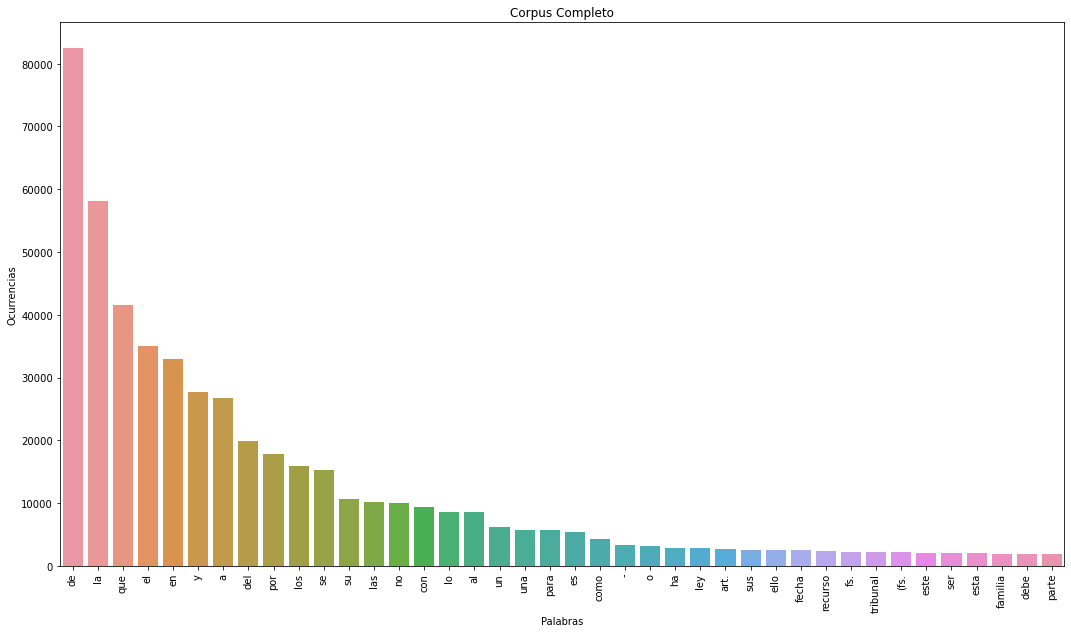

In [18]:
limit_to_plot=40

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes, x = "word" , y = "total_word_count", df = df_common_word_total ,title ="Corpus Completo" , limit_to_plot = limit_to_plot  )

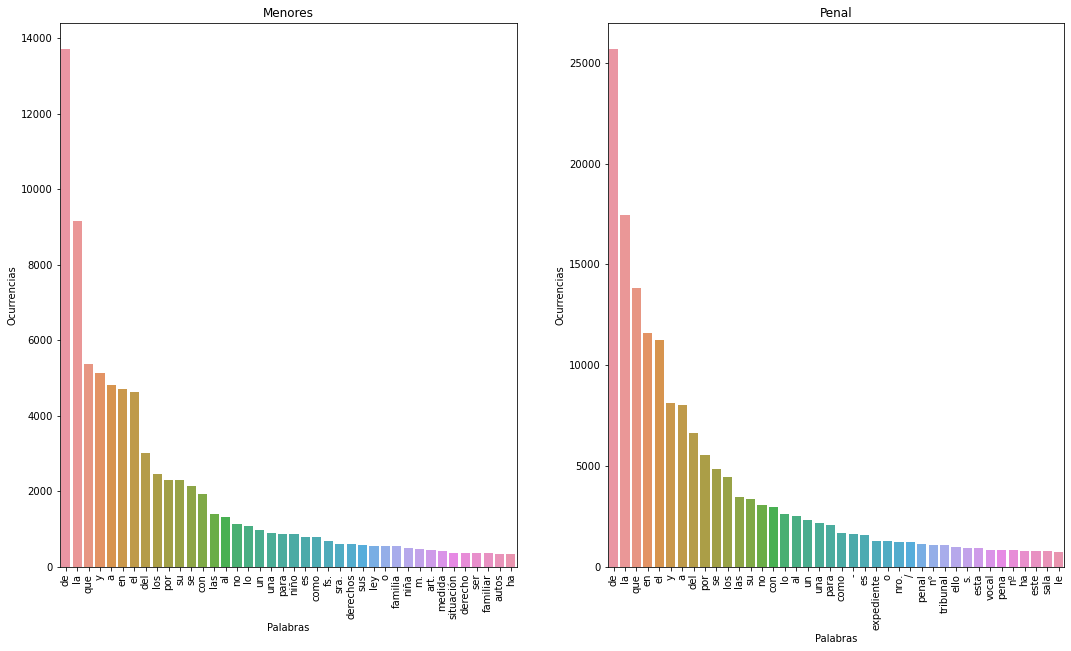

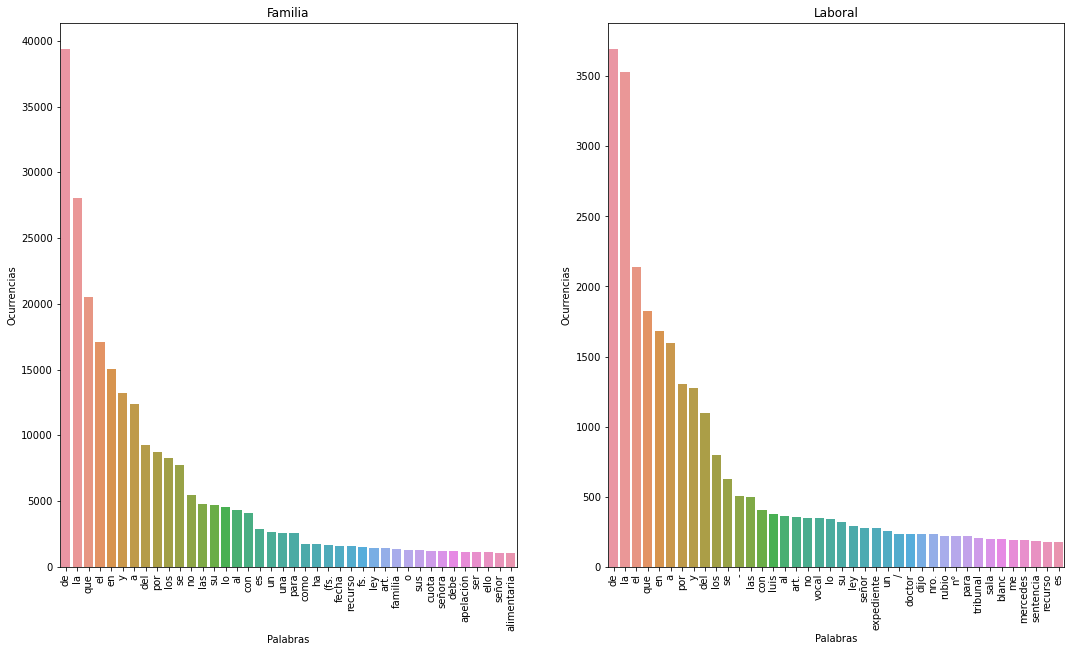

In [19]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_menores ,title ="Menores" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_penal ,title ="Penal" , limit_to_plot = limit_to_plot )


fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word" , y = "count", df = df_common_words_familia ,title ="Familia" , limit_to_plot = limit_to_plot )
graph_cba.plot_word_frequency (axes = axes[1], x = "word" , y = "count", df = df_common_words_laboral ,title ="Laboral" , limit_to_plot = limit_to_plot )

# Analizar palabras más frecuentes y menos frecuentes. Seleccionar 5 documentos de cada fuero y realizar el mismo análisis. ¿Se repiten las palabras?

In [20]:
# Selecting 5 random documents from each jurisdiction
penal_selected = corpus_df[corpus_df['classifier'].str.contains('PENAL')].sample(5)
menores_selected = corpus_df[corpus_df['classifier'].str.contains('MENORES')].sample(5)
laboral_selected = corpus_df[corpus_df['classifier'].str.contains('LABORAL')].sample(5)
familia_selected = corpus_df[corpus_df['classifier'].str.contains('FAMILIA')].sample(5)

# Merging 
final_selected = menores_selected.append(penal_selected).append(laboral_selected).append(familia_selected)

# Getting the words from all the documents to a single row

fueros = ["Documentos/PENAL" , "Documentos/MENORES" , "Documentos/LABORAL","Documentos/FAMILIA" ]
aggregated_selected_df = create_df_text_agregated_by_jurisdiction(fueros, final_selected)

(df_penal_selected_words, penal_selected_words) = nlp_cba.get_word_ocurrence_df(aggregated_selected_df, 'Documentos/PENAL')
(df_menores_selected_words, menores_selected_words) = nlp_cba.get_word_ocurrence_df(aggregated_selected_df,'Documentos/MENORES')
(df_laboral_selected_words, laboral_selected_words) = nlp_cba.get_word_ocurrence_df(aggregated_selected_df, 'Documentos/LABORAL')
(df_familia_selected_words, familia_selected_words) = nlp_cba.get_word_ocurrence_df(aggregated_selected_df ,'Documentos/FAMILIA' )

## Comparativa total Penal vs 5 documentos seleccionados aleatoriamente

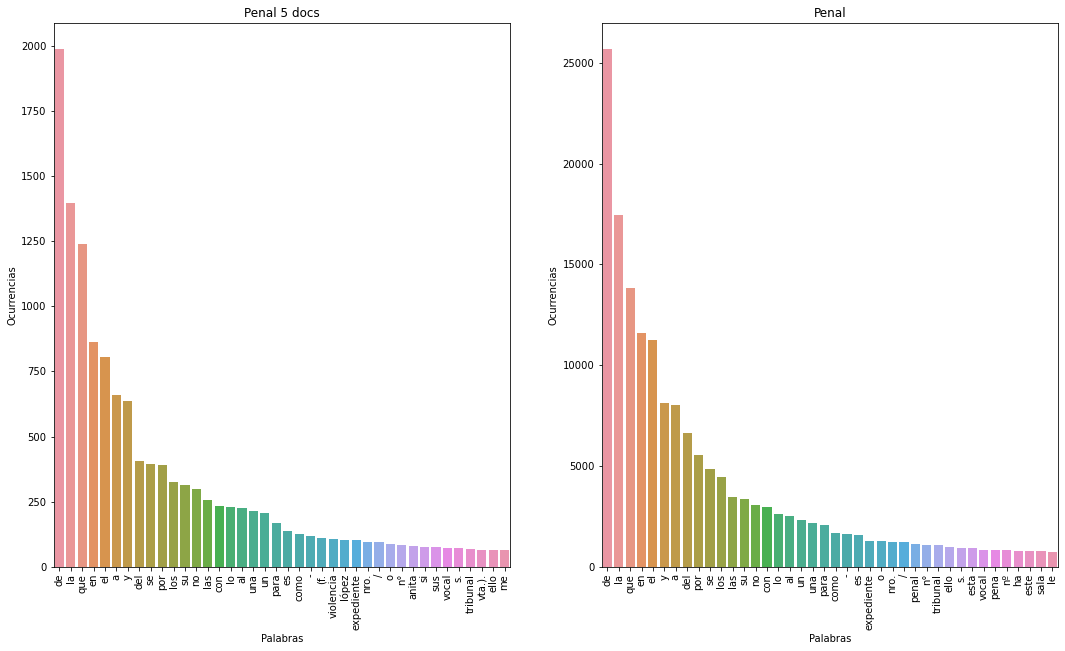

In [21]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency(axes = axes[0], x = "word", y = "count", df = df_penal_selected_words ,title ="Penal 5 docs", limit_to_plot = limit_to_plot)
graph_cba.plot_word_frequency(axes = axes[1], x = "word", y = "count", df = df_common_words_penal ,title ="Penal", limit_to_plot = limit_to_plot)

## Comparativa total Menores vs 5 documentos seleccionados aleatoriamente

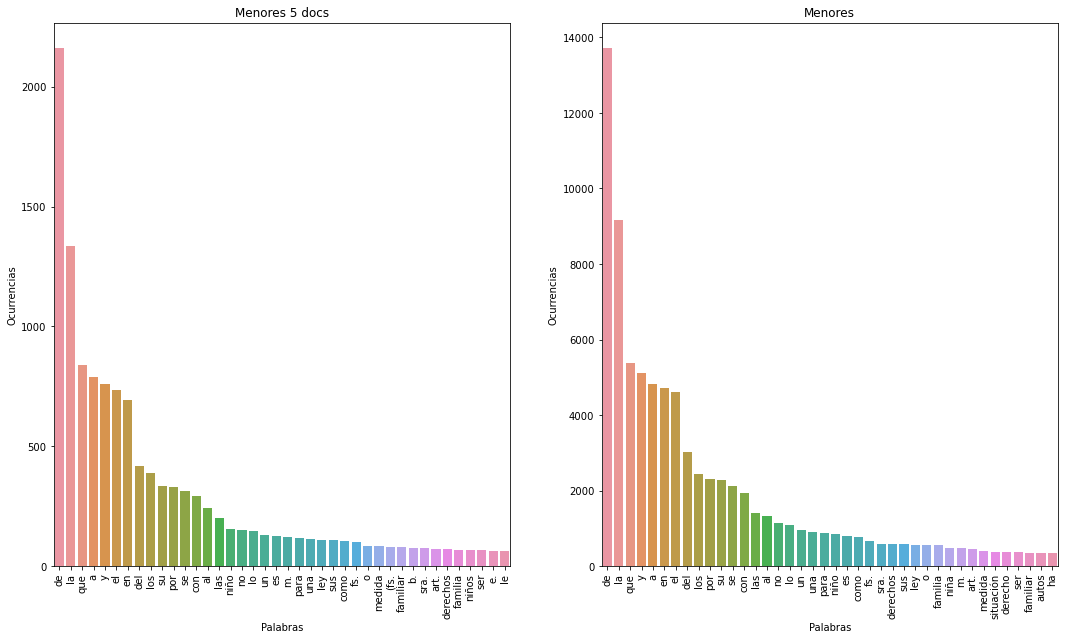

In [22]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency(axes = axes[0], x = "word", y = "count", df = df_menores_selected_words, title ="Menores 5 docs", limit_to_plot = limit_to_plot)
graph_cba.plot_word_frequency(axes = axes[1], x = "word", y = "count", df = df_common_words_menores, title ="Menores", limit_to_plot = limit_to_plot)

## Comparativa total Laboral vs 5 documentos seleccionados aleatoriamente

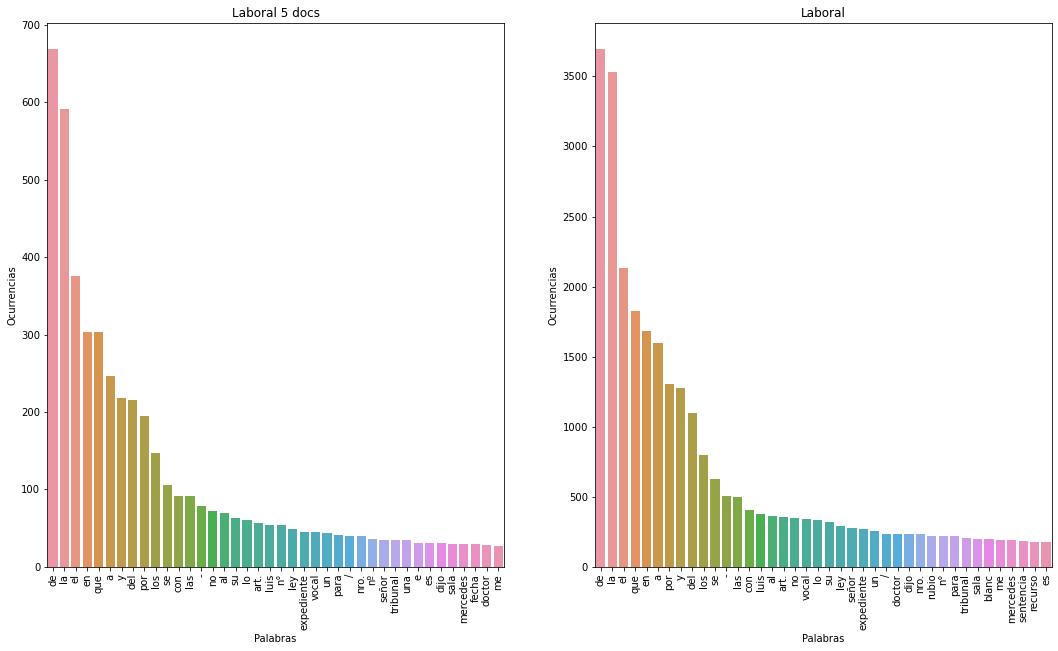

In [23]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word", y = "count", df = df_laboral_selected_words ,title ="Laboral 5 docs", limit_to_plot = limit_to_plot)
graph_cba.plot_word_frequency (axes = axes[1], x = "word", y = "count", df = df_common_words_laboral ,title ="Laboral", limit_to_plot = limit_to_plot)

## Comparativa total Familia vs 5 documentos seleccionados aleatoriamente

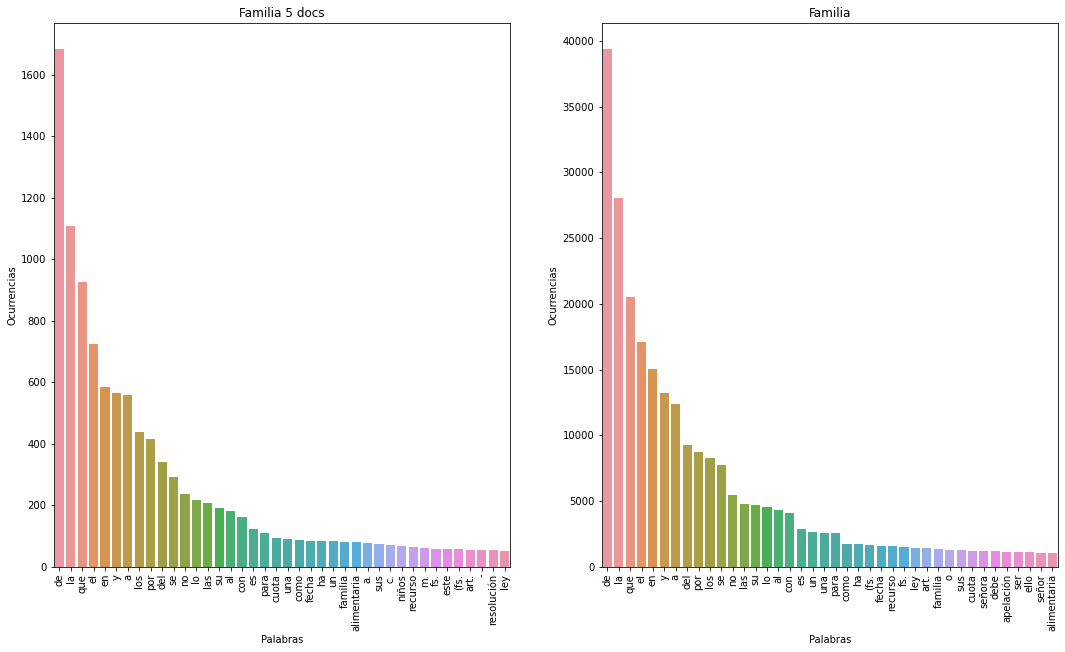

In [24]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

graph_cba.plot_word_frequency (axes = axes[0], x = "word", y = "count", df = df_familia_selected_words ,title ="Familia 5 docs", limit_to_plot = limit_to_plot)
graph_cba.plot_word_frequency (axes = axes[1], x = "word", y = "count", df = df_common_words_familia ,title ="Familia", limit_to_plot = limit_to_plot)

# Hacer lo mismo con n-gramas.
Hacemos la distribución de frecuencia de bi-gramas y tri-gramas por fuero, no por documentos individuales. 

In [25]:
def plot_ngrams_dist_plots(x, y , data , limit_to_plot):
    
    fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

    graph_cba.plot_word_frequency (axes = axes[0], x = x , y = y, df = data[0]["df"] ,title  = data[0]["title"] , limit_to_plot = limit_to_plot )
    graph_cba.plot_word_frequency (axes = axes[1], x = x , y = y, df = data[1]["df"] ,title  = data[1]["title"] , limit_to_plot = limit_to_plot )
    
    fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

    graph_cba.plot_word_frequency (axes = axes[0], x = x , y = y, df = data[2]["df"] ,title  = data[2]["title"] , limit_to_plot = limit_to_plot )
    graph_cba.plot_word_frequency (axes = axes[1], x = x , y = y, df = data[3]["df"] ,title  = data[3]["title"] , limit_to_plot = limit_to_plot )

## Histogramas

### Bi-gramas

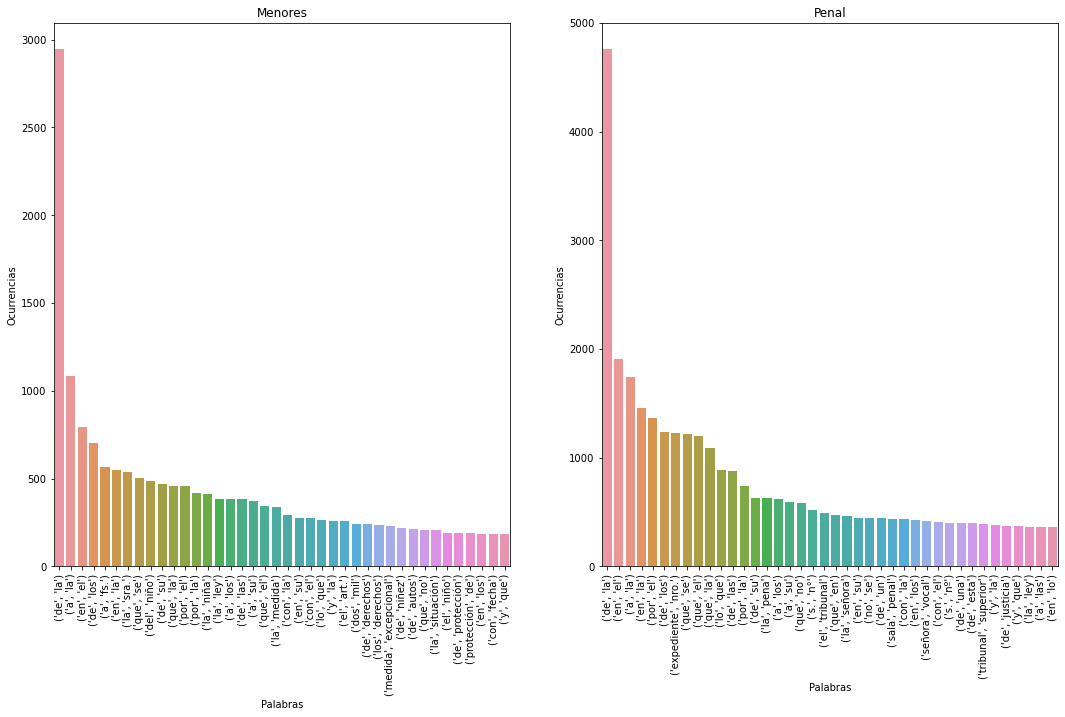

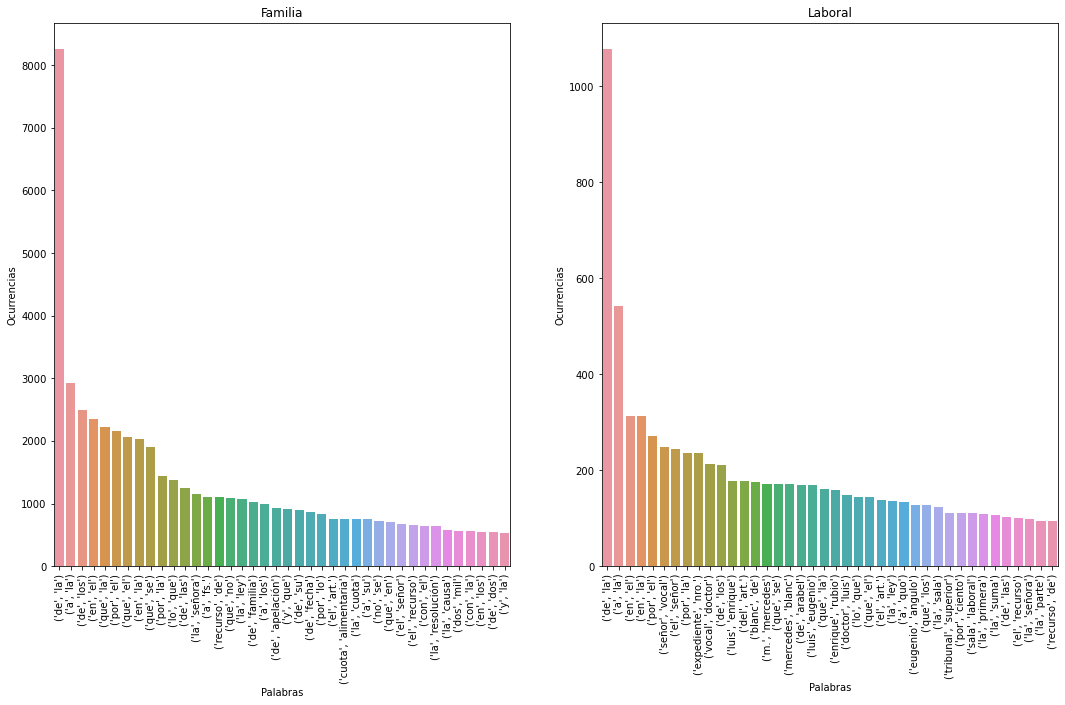

In [26]:
df_menores_bigrams_count = nlp_cba.get_anagrams_count_df(common_words_menores,2 )
df_penal_bigrams_count = nlp_cba.get_anagrams_count_df(common_words_penal,2 )
df_familia_bigrams_count = nlp_cba.get_anagrams_count_df(common_words_familia,2 )
df_laboral_bigrams_count = nlp_cba.get_anagrams_count_df(common_words_laboral,2 )

x = "word"
y = "count"

data = [{"df": df_menores_bigrams_count , "title": "Menores"} ,
        {"df": df_penal_bigrams_count , "title": "Penal"} , 
        {"df": df_familia_bigrams_count , "title": "Familia"} , 
        {"df": df_laboral_bigrams_count , "title": "Laboral"} , 
       ]
plot_ngrams_dist_plots(x, y , data , limit_to_plot)

### Tri-gramas

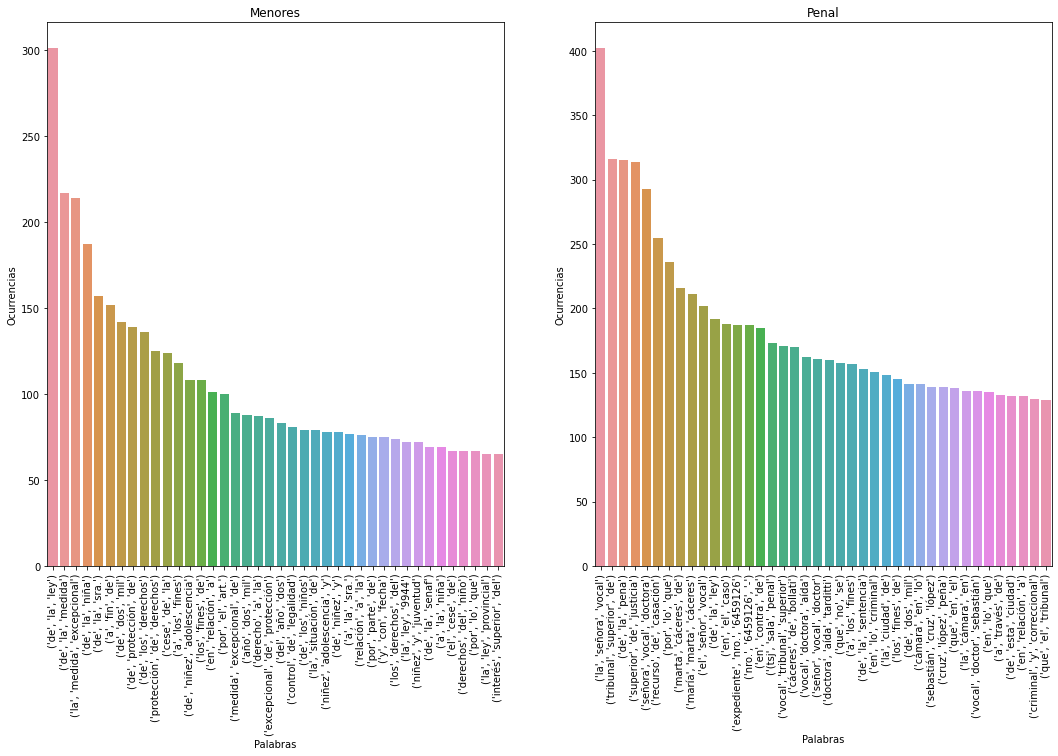

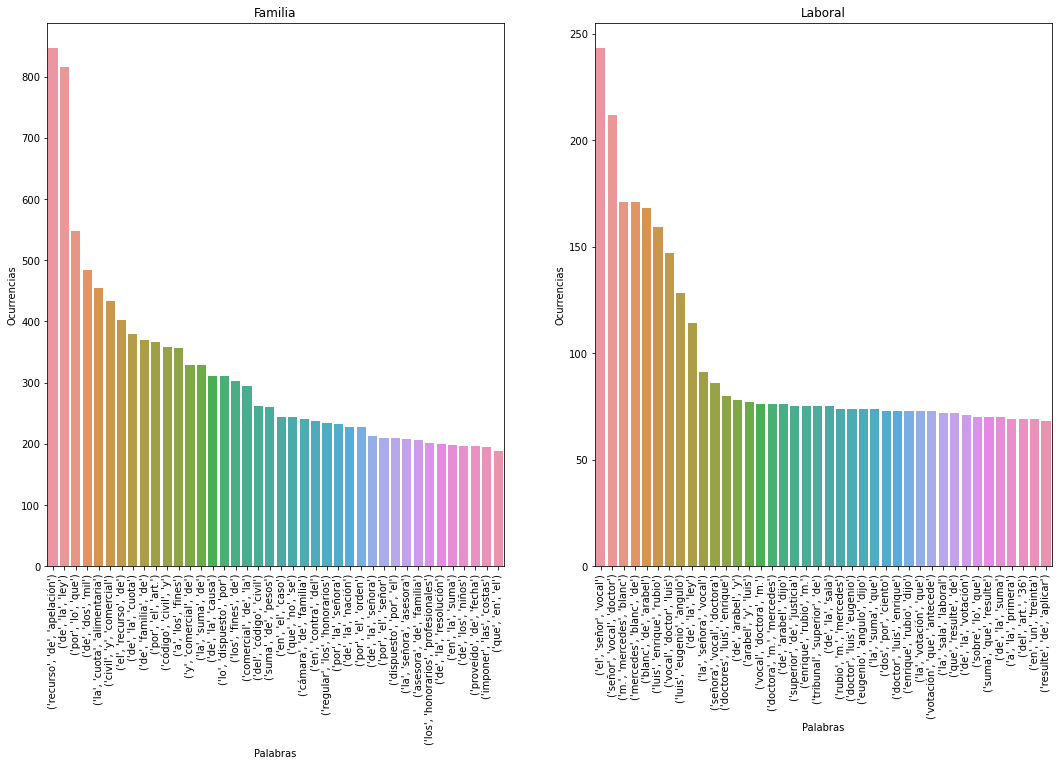

In [27]:
df_menores_trigrams_count = nlp_cba.get_anagrams_count_df(common_words_menores,3 )
df_penal_trigrams_count = nlp_cba.get_anagrams_count_df(common_words_penal,3 )
df_familia_trigrams_count = nlp_cba.get_anagrams_count_df(common_words_familia,3 )
df_laboral_trigrams_count = nlp_cba.get_anagrams_count_df(common_words_laboral,3 )

x = "word"
y = "count"

data = [{"df": df_menores_trigrams_count , "title": "Menores"} ,
        {"df": df_penal_trigrams_count , "title": "Penal"} , 
        {"df": df_familia_trigrams_count , "title": "Familia"} , 
        {"df": df_laboral_trigrams_count , "title": "Laboral"} , 
       ]
plot_ngrams_dist_plots(x, y , data , limit_to_plot)

## Nube de palabras

### Bi-gramas

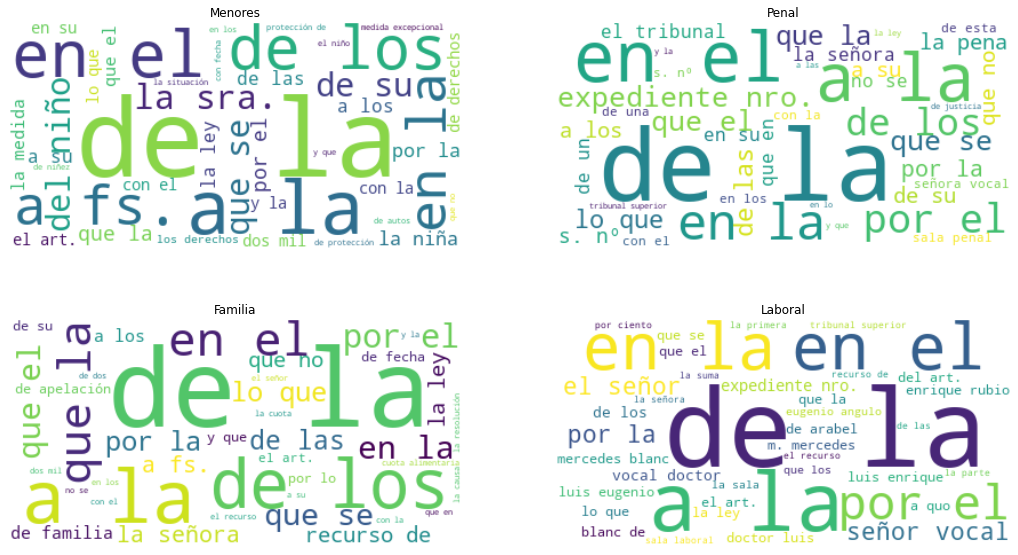

In [28]:
limit_words = 40


df_menores_ngrams_count_tmp = nlp_cba.get_df_word_cloud(df = df_menores_bigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_penal_ngrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_penal_bigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_familia_ngrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_familia_bigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_laboral_ngrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_laboral_bigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_menores_ngrams_count_tmp , limit_words, "Menores" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[0][1], df_penal_ngrams_count_tmp , limit_words, "Penal" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][0], df_familia_ngrams_count_tmp , limit_words, "Familia" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][1], df_laboral_ngrams_count_tmp , limit_words, "Laboral" , columns = ["word_","count"])

### Tri-gramas

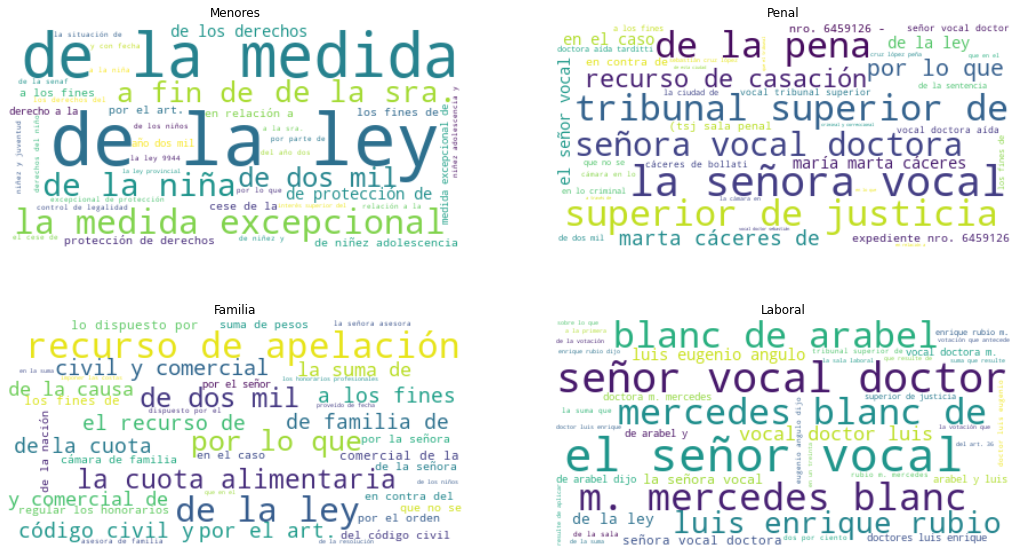

In [29]:
limit_words = 40


df_menores_ngrams_count_tmp = nlp_cba.get_df_word_cloud(df = df_menores_trigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_penal_ngrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_penal_trigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_familia_ngrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_familia_trigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )
df_laboral_ngrams_count_tmp =  nlp_cba.get_df_word_cloud(df = df_laboral_trigrams_count , column = "word"  , column_order = "count" , limit_words = limit_words )

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_menores_ngrams_count_tmp , limit_words, "Menores" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[0][1], df_penal_ngrams_count_tmp , limit_words, "Penal" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][0], df_familia_ngrams_count_tmp , limit_words, "Familia" , columns = ["word_","count"])
graph_cba.plot_word_cloud(axes[1][1], df_laboral_ngrams_count_tmp , limit_words, "Laboral" , columns = ["word_","count"])

# Visualizar la frecuencia de palabras en una nube de palabras.

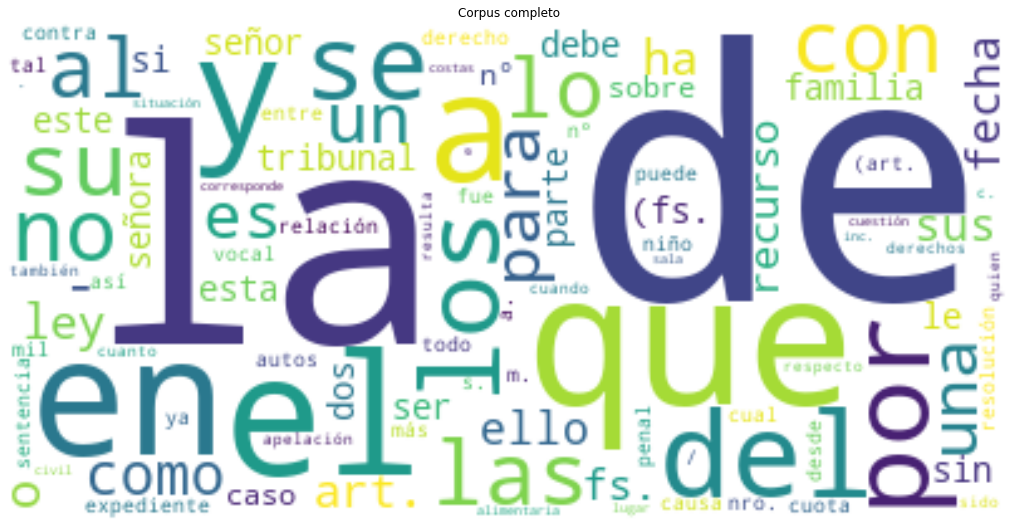

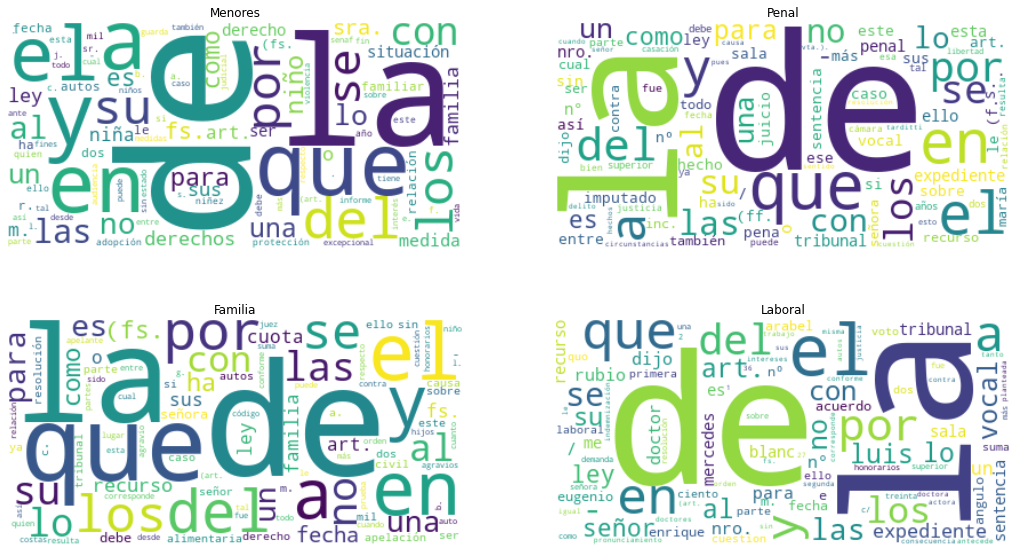

In [30]:
limit_words = 100

fig, axes = plt.subplots(1, 1 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes, df_common_word_total , limit_words, "Corpus completo" , columns = ["word","total_word_count"])

fig, axes = plt.subplots(2, 2 , figsize=(18, 10))

graph_cba.plot_word_cloud(axes[0][0], df_common_words_menores , limit_words, "Menores" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[0][1], df_common_words_penal , limit_words, "Penal" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[1][0], df_common_words_familia , limit_words, "Familia" , columns = ["word","count"])
graph_cba.plot_word_cloud(axes[1][1], df_common_words_laboral , limit_words, "Laboral" , columns = ["word","count"])

# Conclusión 

- Las palabras con mayor frecuencia se repiten en los documentos de todos los fueros ( de, la que, el, en, y, a entre otras palabras). Lo mismo sucede con los bi-gramas ( de - la ; a – la ; en – el entre otros).En el caso de los tri-gramas se comienzan a ver diferencia, lo que es lógico pues es menos probable encontrar que se repitan combianciones a medida que aumenta la cantidad de palabras el n-grama. 

- Se puede apreciar que la distribución parece ser la misma tanto en el histograma que solo representa 5 documentos, como en los corpus por fuero, como así también en el corpus general. Las primeras palabras suelen también ser las mismas en ambos histogramas para cada fuero aunque en algunos casos el orden se ve levemente alterado ("la" pasa de posición 2 a posición 3 por ej.)

- Vemos que en todos los casos se cumple la ley de Zipf. La ley de Zipf se cumple tanto en el corpus por fuero como así también en el corpus consolidado de todos los fueros.

- Se han detectado errores de ortografía y mal uso de los signos de puntación. 

- Se observa un desbalanceo en la cantidad de documentos (sentencias / fallos) por fuero: 


    - FAMILIA: 124
    - LABORAL: 37
    - MENORES: 29
    - PENAL:   53
 

- Se observa que el fuero Laboral tiene mayor cantidad de documentos (sentencias / fallaos) que el fuero Menores, sin embargo el corpus generado a partir de los documentos del fuero de Menores es mayor (tiene más palabras) que el fuero Laboral. 


In [31]:
corpus_df.groupby(["classifier"]).count()

,text
classifier,
Documentos/FAMILIA,124
Documentos/LABORAL,37
Documentos/MENORES,29
Documentos/PENAL,53


In [32]:
print (f"Corpus Menores: {df_common_words_menores['count'].sum()} Corpus Laboral: {df_common_words_laboral['count'].sum()}")

Corpus Menores: 180978 Corpus Laboral: 64431


- Los desbalanceos antes mencionados pueden suponer un problema al momento de entrenar modelos.